In [1]:
import numpy as np
import pandas as pd
import pathlib

In [2]:
DATA_DIR = pathlib.Path("../data")
train_target = pd.read_csv(DATA_DIR.joinpath("rubber_target_train.csv"), index_col="date", parse_dates=["date"])
test_target = pd.read_csv(DATA_DIR.joinpath("rubber_test_timestamps.csv"), index_col="date", parse_dates=["date"])
data = pd.read_csv(DATA_DIR.joinpath("rubber_daily.csv"), index_col="date", parse_dates=["date"])

In [7]:
pd.Series(test_target.index).describe()

count                      42
unique                     42
top       2018-10-01 00:00:00
freq                        1
first     2016-01-01 00:00:00
last      2019-06-01 00:00:00
Name: date, dtype: object

In [11]:
data = train_target.copy()
data['month'] = data.index.month

for i in range(1, 6):
    data['shifted_' + str(i)] = data['rubber'].shift(i)
    
y = data['rubber']
data.drop('rubber', axis=1, inplace=True)
data['rubber'] = y # так надо
y = y['2003-01-01':]

In [12]:
train = data['2003-01-01':]

test = test_target.copy()
test['month'] = test.index.month

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train.drop('rubber', axis=1).values, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
full_data = pd.concat((train, test), axis=0, sort=False)
full_data.head()

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,rubber
date,,,,,,,
2003-01-01,1,849.875000,840.250000,831.304348,895.476190,830.595238,903.095238
2003-02-01,2,903.095238,849.875000,840.250000,831.304348,895.476190,940.000000
2003-03-01,3,940.000000,903.095238,849.875000,840.250000,831.304348,945.833333
2003-04-01,4,945.833333,940.000000,903.095238,849.875000,840.250000,877.976190
2003-05-01,5,877.976190,945.833333,940.000000,903.095238,849.875000,837.000000


In [16]:
for date in test_target.index:
    dt = date
    for i in range(1, 6):
        if dt.month == 1:
            dt = pd.datetime(dt.year - 1, 12, 1)
        else:
            dt = pd.datetime(dt.year, dt.month - 1, 1)
        full_data.loc[date, 'shifted_' + str(i)] = full_data.loc[dt]['rubber']
    full_data.loc[date, 'rubber'] = model.predict([full_data.drop('rubber', axis=1).loc[date]])

In [17]:
full_data['2015-5-1':'2016-5-1']

,month,shifted_1,shifted_2,shifted_3,shifted_4,shifted_5,rubber
date,,,,,,,
2015-05-01,5,1406.380952,1428.454545,1414.055556,1422.619048,1476.545455,1553.600000
2015-06-01,6,1553.600000,1406.380952,1428.454545,1414.055556,1422.619048,1590.571429
2015-07-01,7,1590.571429,1553.600000,1406.380952,1428.454545,1414.055556,1453.772727
2015-08-01,8,1453.772727,1590.571429,1553.600000,1406.380952,1428.454545,1319.947368
2015-09-01,9,1319.947368,1453.772727,1590.571429,1553.600000,1406.380952,1247.200000
2015-10-01,10,1247.200000,1319.947368,1453.772727,1590.571429,1553.600000,1252.136364
2015-11-01,11,1252.136364,1247.200000,1319.947368,1453.772727,1590.571429,1171.450000
2015-12-01,12,1171.450000,1252.136364,1247.200000,1319.947368,1453.772727,1171.571429
2016-01-01,1,1171.571429,1171.450000,1252.136364,1247.200000,1319.947368,1208.142592


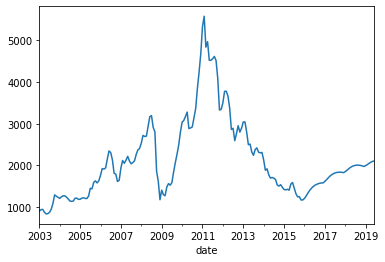

In [20]:
import matplotlib.pyplot as plt
full_data['rubber'].plot()
plt.show()

In [21]:
test_target['rubber'] = full_data['2016-1-1':]['rubber']
test_target.to_csv('../submissions/stupidtimeseriesrubber.csv')